In [3]:
import numpy as np
import tensorflow as tf
import time
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# HOG Feature Extraction
def extract_hog_features(images):
    hog_features = []
    for image in images:
        gray_image = np.dot(image[..., :3], [0.299, 0.587, 0.114])
        hog_feature = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(hog_feature)
    return np.array(hog_features)

x_train = extract_hog_features(x_train)
x_test = extract_hog_features(x_test)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components=0.95)  # Retain 95% variance
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)


In [4]:
C_value = 10
gamma_value = 'scale'
print(f"Training SVM with RBF kernel, C={C_value}, gamma={gamma_value})...")

start_time = time.time()
svm_rbf3 = SVC(kernel='rbf', C=C_value, gamma=gamma_value, decision_function_shape='ovr')
svm_rbf3.fit(x_train, y_train)
print("Evaluating model...")
y_pred = svm_rbf3.predict(x_test)
end_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Training SVM with RBF kernel, C=10, gamma=scale)...
Evaluating model...
Accuracy: 0.64


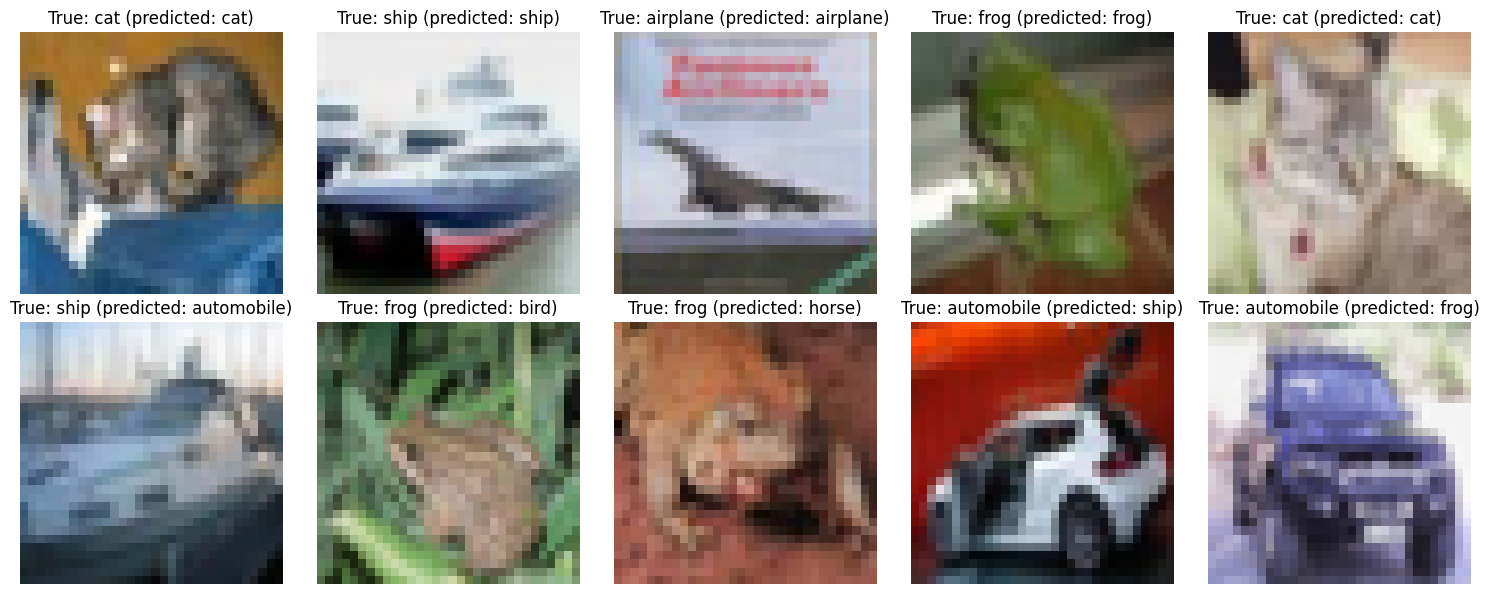

In [ ]:
def plot_classification_examples(original_images, y_true, y_pred, labels, correct_indices, incorrect_indices, n=5):
    fig, axes = plt.subplots(2, n, figsize=(15, 6))

    for i, idx in enumerate(correct_indices[:n]):
        ax = axes[0, i]
        ax.imshow(original_images[idx])
        ax.set_title(f"True: {labels[y_true[idx]]} (predicted: {labels[y_pred[idx]]})")
        ax.axis('off')

    for i, idx in enumerate(incorrect_indices[:n]):
        ax = axes[1, i]
        ax.imshow(original_images[idx])
        ax.set_title(f"True: {labels[y_true[idx]]} (predicted: {labels[y_pred[idx]]})")
        ax.axis('off')

    axes[0, 0].set_ylabel("Correct", size='large')
    axes[1, 0].set_ylabel("Incorrect", size='large')
    plt.tight_layout()
    plt.show()


correct_indices = [i for i in range(len(y_test)) if y_test[i] == y_pred[i]]
incorrect_indices = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]

plot_classification_examples(
    original_images=tf.keras.datasets.cifar10.load_data()[1][0],  # Original x_test images
    y_true=y_test,
    y_pred=y_pred,
    labels=labels,
    correct_indices=correct_indices,
    incorrect_indices=incorrect_indices,
    n=5
)


In [18]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1000
           1       0.77      0.77      0.77      1000
           2       0.51      0.51      0.51      1000
           3       0.46      0.45      0.45      1000
           4       0.54      0.57      0.56      1000
           5       0.54      0.52      0.53      1000
           6       0.68      0.71      0.69      1000
           7       0.71      0.66      0.68      1000
           8       0.74      0.71      0.72      1000
           9       0.76      0.74      0.75      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



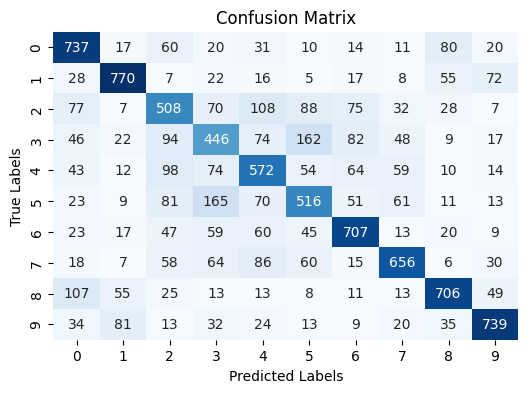

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1000
           1       0.77      0.77      0.77      1000
           2       0.51      0.51      0.51      1000
           3       0.46      0.45      0.45      1000
           4       0.54      0.57      0.56      1000
           5       0.54      0.52      0.53      1000
           6       0.68      0.71      0.69      1000
           7       0.71      0.66      0.68      1000
           8       0.74      0.71      0.72      1000
           9       0.76      0.74      0.75      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
